In [238]:
import json
import pandas as pd
import requests

In [277]:
index='twitter_query'
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])
data_df

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,Bekasi aja,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,loving oci 24/7,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,stay,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,Kuantan Pahang,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,1397817744624656384,1.622093e+09,OPublicaINFO,“Livrabilele” programului “România educată” ...,The “deliverables” of the “Educated Romania” p...,2021/05/27 07:31:35,ro,ro,False,128,Slatina-Olt,Publicatie Online - Revista presei,Online Publication - Press Review,http://pbs.twimg.com/profile_images/9060877700...,,,0,0,https://twitter.com/OPublicaINFO/status/139781...
17803,1397817049209053187,1.622093e+09,EYNCNrvu3JHzK82,RT @strani_placenik: Naprednjaci upravo tiho k...,RT @strani_placenik: Napredniks are just quiet...,2021/05/27 07:28:49,und,und,False,0,,,None,http://pbs.twimg.com/profile_images/1397813907...,,strani_placenik,33,0,https://twitter.com/EYNCNrvu3JHzK82/status/139...
17804,1397815813164486657,1.622093e+09,TzvetVassilev,"RT @radosveta_vass: 1. @clubz_bg, Във връзка с...","RT @radosveta_vass: 1. @clubz_bg, In connectio...",2021/05/27 07:23:54,bg,bg,False,667,,"Banking Chairman, Entrepreneur, Enemy of Bulga...","Banking Chairman, Entrepreneur, Enemy of Bulga...",http://pbs.twimg.com/profile_images/8091678486...,КТБ,"radosveta_vass, clubz_bg",5,0,https://twitter.com/TzvetVassilev/status/13978...
17805,1397815137743028227,1.622093e+09,hen02sng,RT @_nuthatch_: Widzę że Yixing się na węd...,RT @_nuthatch_: I see Yixing has switched to f...,2021/05/27 07:21:13,pl,pl,False,1990,SHE!¡HER . . . 18,exo nct ## love zone | khh🖇️krnb,exo nct ## love zone | khh🖇️krnb,http://pbs.twimg.com/profile_images/1399123298...,,_nuthatch_,15,0,https://twitter.com/hen02sng/status/1397815137...


In [279]:
data_df['text_en'].loc[0]

'@jeobby05 bismillah kelirik kak mel cantippp !!! may his kindness be rewarded and all his affairs be made easier aamiin'

In [283]:
data_df['text_en'].loc[7000]

'Germany may continue to promote combined heat and power: With the approval of the EU Commission, Germany may in future support combined heat and power with up to 1.8 billion euros per year. #energy policy #energy #energy management'

In [294]:
data_df['text_en'].loc[17804]

'RT @radosveta_vass: 1. @clubz_bg, In connection with the ridiculous material you heard about the #CTB case yesterday, I would like to express my indignation ...'

# Data Cleaning

In [284]:
data_df.dtypes
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en              62
date                  0
lang                  0
iso_lang              0
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en       3094
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

In [285]:
data_df=data_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en               0
date                  0
lang                  0
iso_lang              0
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en       3082
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

## twitter query

In [54]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/clairebeswick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/clairebeswick/nltk_data...


In [287]:
#sid.polarity_scores('Enough fish to feed 33 million people is being taken from West African waters to be used as fishmeal in agriculture and aquaculture around the world.\n\nThis is devastating local communities in the area! Their voices must be heard. \n\n#StolenFish\n')

{'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.68}

In [288]:
#sid.polarity_scores('Arizona’s Democratic Secretary of State Katie Hobbs is running for Governor of Arizona in 2022.\n\nFlorida’s Democratic Commissioner of Agriculture Nikki Fried is running for Governor of Florida in 2022.\n\nStrong women are taking over. You love to see it.')

{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.8176}

In [289]:
#sid.polarity_scores("'Button mushrooms picked and trimmed by robots' -   #futureofag #agriculture #technology")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [299]:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[0.8713, 0.7912, 0.7351, 0.25, 0.9001, -0.3382, 0.0, -0.1695, 0.3612, 0.0]

In [300]:
data_df['compound_score']=list_scores
data_df.head()

<ipython-input-300-5600de801981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['compound_score']=list_scores


,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,Bekasi aja,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...,0.8713
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...,0.7912
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,loving oci 24/7,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...,0.7351
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,stay,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...,0.2500
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,Kuantan Pahang,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...,0.9001


In [303]:
# create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)

data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# display updated DataFrame
data_df.head()

<ipython-input-303-2558a4d33dca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sentiment'] = np.select(conditions, values)
<ipython-input-303-2558a4d33dca>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])


,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,...,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...,0.8713,positive
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,...,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...,0.7912,positive
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,...,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...,0.7351,positive
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,...,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...,0.2500,positive
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,...,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...,0.9001,positive


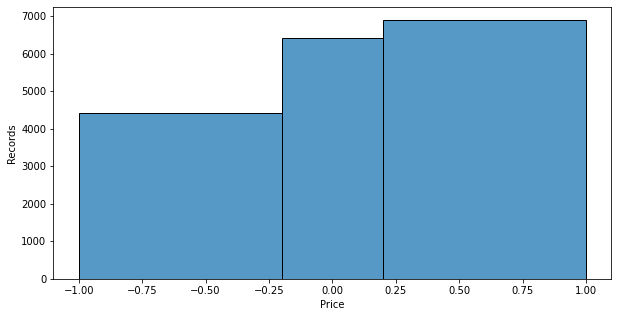

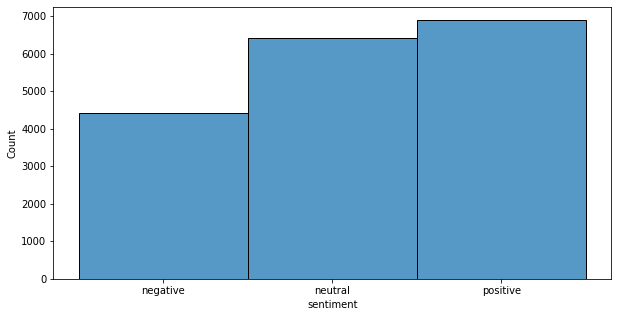

/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


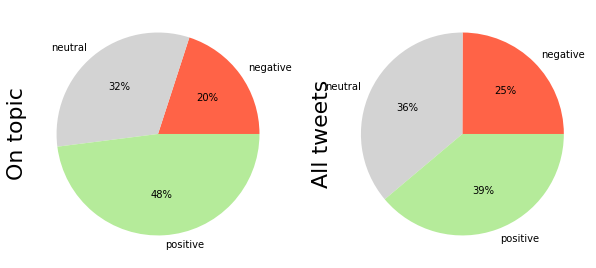

<Figure size 720x360 with 0 Axes>

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_df_subset=data_df.sample(n=100)

plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Records')
sns.histplot(data_df['compound_score'],bins=[-1,-0.20,0.20,1],kde=False)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data_df['sentiment'])
plt.show()

def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))
data_df_subset.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()

plt.show()

In [305]:
data_df[['id','compound_score','sentiment']].to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_query_sentiment_reduced.json')

## twitter press

In [307]:
lexai_url = f"http://35.223.18.2/indexes/twitter_press/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en            2871
date                  0
lang                  0
iso_lang           6147
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en       3001
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

In [308]:
data_df=data_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en               0
date                  0
lang                  0
iso_lang           3276
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en        151
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

In [309]:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[0.0, 0.34, 0.0, 0.0, 0.4767, 0.0, -0.1027, -0.0516, -0.0516, -0.34]

In [310]:
data_df['compound_score']=list_scores
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
454,1400737892616519683,1.622790e+09,noticiaaominuto,Sinta-se em casa numa destas igrejas convertid...,Feel at home in one of these churches converte...,2021/06/04 08:55:12,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,casaaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
455,1400737870202167296,1.622790e+09,noticiaaominuto,Nepalesa? Uma variante que nós nem sequer val...,Nepali? A variant that we didn&#39;t even valu...,2021/06/04 08:55:07,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.3400
456,1400737847812972551,1.622790e+09,noticiaaominuto,Atlético de Madrid pisca o olho a Bernardo Si...,Atlético de Madrid winks at Bernardo Silva #de...,2021/06/04 08:55:02,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,desportoaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
478,1400735376948576256,1.622789e+09,noticiaaominuto,Novo iPad Pro da Apple poderá ter carregament...,New Apple iPad Pro may have wireless charging ...,2021/06/04 08:45:12,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,techaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
480,1400735354450239489,1.622789e+09,noticiaaominuto,Amigos da Ria de Aveiro apontam dedo às pecua...,Friends of Ria de Aveiro point the finger at M...,2021/06/04 08:45:07,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.4767


In [312]:
# create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)

data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# display updated DataFrame
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
454,1400737892616519683,1.622790e+09,noticiaaominuto,Sinta-se em casa numa destas igrejas convertid...,Feel at home in one of these churches converte...,2021/06/04 08:55:12,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,casaaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
455,1400737870202167296,1.622790e+09,noticiaaominuto,Nepalesa? Uma variante que nós nem sequer val...,Nepali? A variant that we didn&#39;t even valu...,2021/06/04 08:55:07,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.3400,positive
456,1400737847812972551,1.622790e+09,noticiaaominuto,Atlético de Madrid pisca o olho a Bernardo Si...,Atlético de Madrid winks at Bernardo Silva #de...,2021/06/04 08:55:02,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,desportoaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
478,1400735376948576256,1.622789e+09,noticiaaominuto,Novo iPad Pro da Apple poderá ter carregament...,New Apple iPad Pro may have wireless charging ...,2021/06/04 08:45:12,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,techaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
480,1400735354450239489,1.622789e+09,noticiaaominuto,Amigos da Ria de Aveiro apontam dedo às pecua...,Friends of Ria de Aveiro point the finger at M...,2021/06/04 08:45:07,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.4767,positive


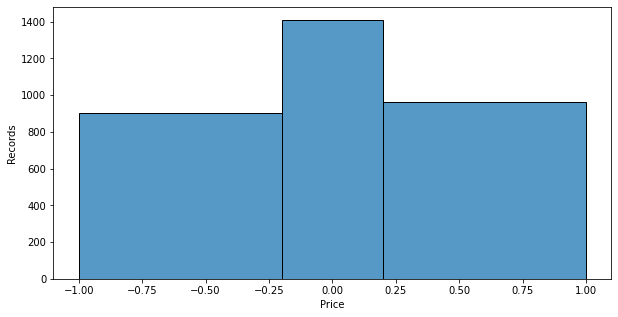

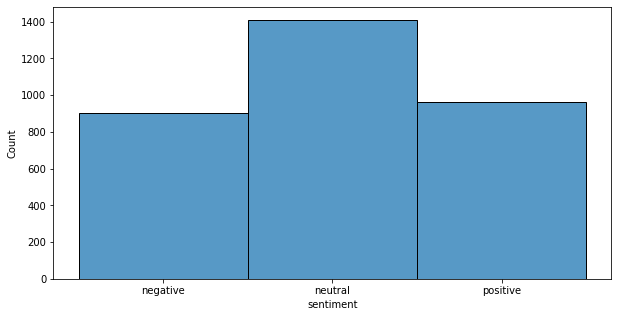

/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


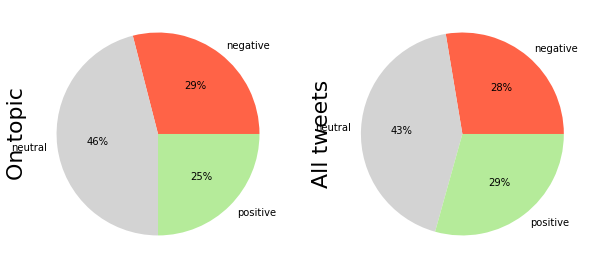

<Figure size 720x360 with 0 Axes>

In [313]:
data_df_subset=data_df.sample(n=100)

plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Records')
sns.histplot(data_df['compound_score'],bins=[-1,-0.20,0.20,1],kde=False)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data_df['sentiment'])
plt.show()

def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))
data_df_subset.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()

plt.show()

In [314]:
data_df[['id','compound_score','sentiment']].to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_press_sentiment_reduced.json')

## Twitter politicians

In [315]:
lexai_url = f"http://35.223.18.2/indexes/twitter_politicians/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])
data_df.isnull().sum()

id                     0
timestamp              0
user                   0
text                   0
text_en             1004
date                   0
lang                   0
iso_lang           20000
user_verified          0
followers_count        0
user_loc               0
user_desc              0
user_desc_en         986
user_image             0
hashtags               0
mentions               0
retweet_count          0
favorite_count         0
link                   0
dtype: int64

In [316]:
data_df=data_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                     0
timestamp              0
user                   0
text                   0
text_en                0
date                   0
lang                   0
iso_lang           18996
user_verified          0
followers_count        0
user_loc               0
user_desc              0
user_desc_en         103
user_image             0
hashtags               0
mentions               0
retweet_count          0
favorite_count         0
link                   0
dtype: int64

In [317]:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[-0.0516, -0.2732, 0.0, 0.0708, 0.0, -0.6486, 0.0, -0.5106, -0.9686, -0.7269]

In [318]:
data_df['compound_score']=list_scores
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
0,1400763714316521474,1.622796e+09,FZarzalejos,La #UniónEuropea🇪🇺 ha estado donde necesitáb...,The #European Union🇪🇺 has been where we needed...,2021/06/04 10:37:49,es,None,False,1127,,Diputado (@EPPGroup) en @EuropeanParliament. M...,Deputy (@EPPGroup) in @EuropeanParliament. Mem...,http://pbs.twimg.com/profile_images/1151083649...,"UniónEuropea, Marruecos, Gobierno",,0,0,https://twitter.com/FZarzalejos/status/1400763...,-0.0516
1,1400761590203494402,1.622795e+09,woelken,Ich werde mehr Transparenz auf Werbemärkten f...,I will demand more transparency in advertising...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,1,13,https://twitter.com/woelken/status/14007615902...,-0.2732
2,1400761591340191746,1.622795e+09,woelken,Mehr Infos zum Wettbewerbsverfahren hier:,More information about the competition procedu...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,0,9,https://twitter.com/woelken/status/14007615913...,0.0000
3,1400761588538294273,1.622795e+09,woelken,Die Kommission hat ein #Wettbewerbsverfahren g...,The Commission has launched a #competition aga...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,"Wettbewerbsverfahren, Facebook, DigitalMarkets...",,2,17,https://twitter.com/woelken/status/14007615885...,0.0708
4,1400761514827583489,1.622795e+09,IdoiaVR,RT @PODEMOS: !!️ Ya están disponibles las ent...,RT @PODEMOS: !! ️ Tickets are now available to...,2021/06/04 10:29:04,es,None,True,10278,,Eurodiputada #Navarra por Unidas Podemos en @L...,MEP #Navarra for United We Can at @Left_EU Res...,http://pbs.twimg.com/profile_images/9467362766...,,PODEMOS,41,0,https://twitter.com/IdoiaVR/status/14007615148...,0.0000
